 # Práctica  4.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Soft SVM \\
  

 ----

 Nombres y  Apellidos de Integrantes (Añada porcentaje de participación de cada miembro del equipo):
 - Integrante 1: Leonardo Isidro. (100%)
 - Integrante 2: Luis Torres.     (100%)
 - Integrante 3: Pedro Mori.      (100%)
 - Integrante 3: Christian Salazar (100%)


*Una vez concluya la práctica debe subir el link de su colab a este  [Drive](https://docs.google.com/spreadsheets/d/1XCxGVmf8g29C7RZSPOqxvZHjjRZg45LHWR8mkZOfS1o/edit?usp=sharing)*


# Librerias

In [ ]:
import math
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf


# Base de datos
1. Descarge en su disco esta Base de Datos:
[Download](https://docs.google.com/spreadsheets/d/15-E3kiLJ6bCyXuJvSmxYAp2QYMkPX2QlQ597fAsPYy8/edit?usp=sharing).
2. Para cargar la base de datos de su disco duro utilize el siguiente comando.
from google.colab import files
uploaded = files.upload()
3. Cargamos 70% de los datos para entrenamiento y el resto para testing
4. Solo estamos tomando 2 características, pero usted debe usar métodos de reducción de la dimensionalidad como PCA.


In [ ]:
# Base de datos
#from google.colab import files
#uploaded = files.upload()

# Cargando datos
Nombre_Data_Set = 'iris - iris.csv'
iris = pd.read_csv(Nombre_Data_Set)


# Cambiamos todos los setosas a 1 y los demás a -1
iris['label'] = np.where(iris['variety'] == 'Setosa', 1, -1)

# 70% para entrenamiento y el resto para testing
iris_train = iris.sample(frac=0.7)
iris_test = iris[~iris.index.isin(iris_train.index)]

# Solo tomamos 2 características para poder ser visualizado (Noda: En realidad debemos reducir la dimensionalidad por ejemplo con componentes principales)

iris_train_x = iris_train[['sepal.length', 'sepal.width']].to_numpy()
iris_train_y = iris_train['label'].to_numpy()

iris_test_x = iris_test[['sepal.length', 'sepal.width']].to_numpy()
iris_test_y = iris_test['label'].to_numpy()



# **Soft SVM**

- Implementar todas las funciones para que este código sea funcional

In [ ]:
def loss(y, x, w, bias, c):
  # write your code here
  """
  l=(np.norm(w)**2)/2
  sum=0
  for i in range(len(y)):
    t=1-(y(i)*np.dot(x(i),w)+b)
    if(t>0):
      sum=sum+t
    else:
      sum=sum+0
  return"""

  hinge_loss = c * np.sum(np.maximum(0, 1 - y * (np.dot(x, w) + bias)))
  regularization_term = np.dot(w, w)/2
  return hinge_loss + regularization_term

In [ ]:
def grad(y, x, w, bias, c):
  grad=[]
  # write your code here
  if(y*(np.dot(x,w)+bias)>=1):
    grad.append(w)
    grad.append(0)
  else:
    grad.append(w - c*x*y)
    grad.append(-c*y)
  return grad

In [ ]:
def update(w, b, grad, alpha):
    w -= alpha * grad[0]
    b -= alpha * grad[1]
    return w, b

# Entrenamiento

In [ ]:
def train(x,y,num_epochs,c=100, alpha=0.000001):
  w = np.random.rand(iris_train_x.shape[1])
  b = np.random.random()

  loss_function = []
  step = num_epochs//10
  for epoch in range(num_epochs):
    loss_value = loss(iris_train_y, iris_train_x, w, b, c)
    loss_function.append(loss_value)
    if epoch % step == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    for idx, x_i in enumerate(iris_train_x):
      grad_values = grad(iris_train_y[idx], x_i, w, b, c)
      w, b = update(w, b, grad_values, alpha)
  return w,b

  plt.plot(range(num_epochs), loss_function, label='Función de pérdida')
  plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# Funciones par graficar

In [ ]:
def plane_intersect(a, b):
    a_vec, b_vec = np.array(a[:3]), np.array(b[:3])
    aXb_vec = np.cross(a_vec, b_vec)
    A = np.array([a_vec, b_vec, aXb_vec])
    d = np.array([-a[3], -b[3], 0.]).reshape(3,1)
    p_inter = np.linalg.solve(A, d).T
    return p_inter[0], (p_inter + aXb_vec)[0]

In [ ]:
def h(x,w,b):
  return np.dot(x,w)+b

In [ ]:
def test(x,w,b,y):
  v = np.dot(x,w) + b
  m = []
  for i in v:
    if(i>0):
      m.append(1)
    else:
      m.append(-1)
  print("Numero de aciertos: ", np.sum(m == y))
  print("Numero de errores: ", np.sum(m != y))

Epoch 0, loss 16103.834084145046
Epoch 700, loss 1918.3304532912343
Epoch 1400, loss 1131.3652305133664
Epoch 2100, loss 938.8437956328772
Epoch 2800, loss 835.2499886532083
Epoch 3500, loss 762.9468541298289
Epoch 4200, loss 714.213213790835
Epoch 4900, loss 690.0159558614972
Epoch 5600, loss 668.4390176587784
Epoch 6300, loss 653.138239092715
Numero de aciertos:  30
Numero de errores:  0


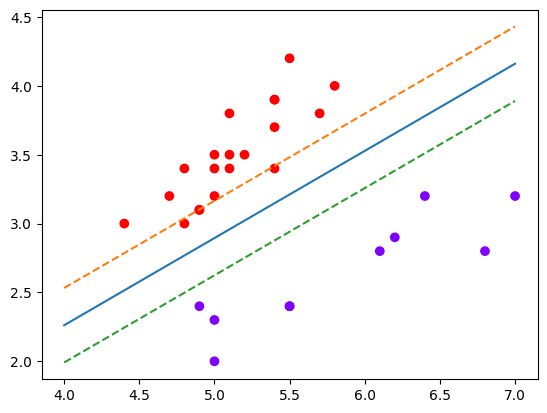

In [ ]:
import matplotlib.cm as cm
w,b = train(iris_train_x,iris_train_y,7000)
iris_y_ = h(iris_test_x, w, b)
iris_y_pred = np.sign(iris_y_)

x_1, x_2 = plane_intersect(list(w)+[0,b], [0,0,1,0])
m = (x_2[1]-x_1[1])/(x_2[0]-x_1[0])
c = -m*x_1[0] + x_1[1]

d = 1/np.linalg.norm(w)
c_p = -m*(x_1[0] + d*math.sqrt(1/(1+m**2))) + x_1[1] + m*d*math.sqrt(1/(1+m**2))

plt.plot(range(4,8), [m*x_i + c for x_i in range(4,8)])
plt.plot(range(4,8), [m*x_i + c - c_p for x_i in range(4,8)], '--')
plt.plot(range(4,8), [m*x_i + c + c_p for x_i in range(4,8)], '--')
plt.scatter(iris_test_x[:,0], iris_test_x[:,1], color=cm.rainbow(iris_y_pred + 1))

test(iris_test_x,w,b,iris_test_y)
